# PROJET ANALYSE DE DONNEES

### CREDIT CARD ELIGIBILITY 

# Importations des librairies 

In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Présentation des données utilisées pour l’étude

In [118]:
credit_data = pd.read_csv('crediCardEligibility/Credit_Card.csv')
credit_data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [119]:
label_data = pd.read_csv('crediCardEligibility/Credit_card_label.csv')
label_data 

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


Fusion des deux jeux de données sur l'ID du client .
Combiner efficacement les informations des deux DataFrames credit_data et label_data en se basant 
sur la colonne commune Ind_ID qui est present dans les deux jeux de données 

In [120]:
original_df = pd.merge(credit_data, label_data,on='Ind_ID',how='inner')
df = original_df
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


df.info()

In [121]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


#### resume des variables qualitatives 

In [122]:
df.describe(include = ['object'])

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
count,1541,1548,1548,1548,1548,1548,1548,1060
unique,2,2,2,4,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,973,924,1010,798,1031,1049,1380,268


In [123]:
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())

GENDER
F    973
M    568
Name: count, dtype: int64
Car_Owner
N    924
Y    624
Name: count, dtype: int64
Propert_Owner
Y    1010
N     538
Name: count, dtype: int64
Type_Income
Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: count, dtype: int64
EDUCATION
Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: count, dtype: int64
Marital_status
Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: count, dtype: int64
Housing_type
House / apartment      1380
With parents             80
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: count, dtype: int64
Type_Occupation
Laborers                 268
Core staff           

#### Le nombre de valeurs prises pour chaque variable 

In [124]:
df.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

# (a)  pré-traitement de données,

### IDENTIFIER LE TYPE DE VALEUR MANQUANTE (MAR , MNAR , MCAR ?) et / ou colonne a supprimé 

<Axes: >

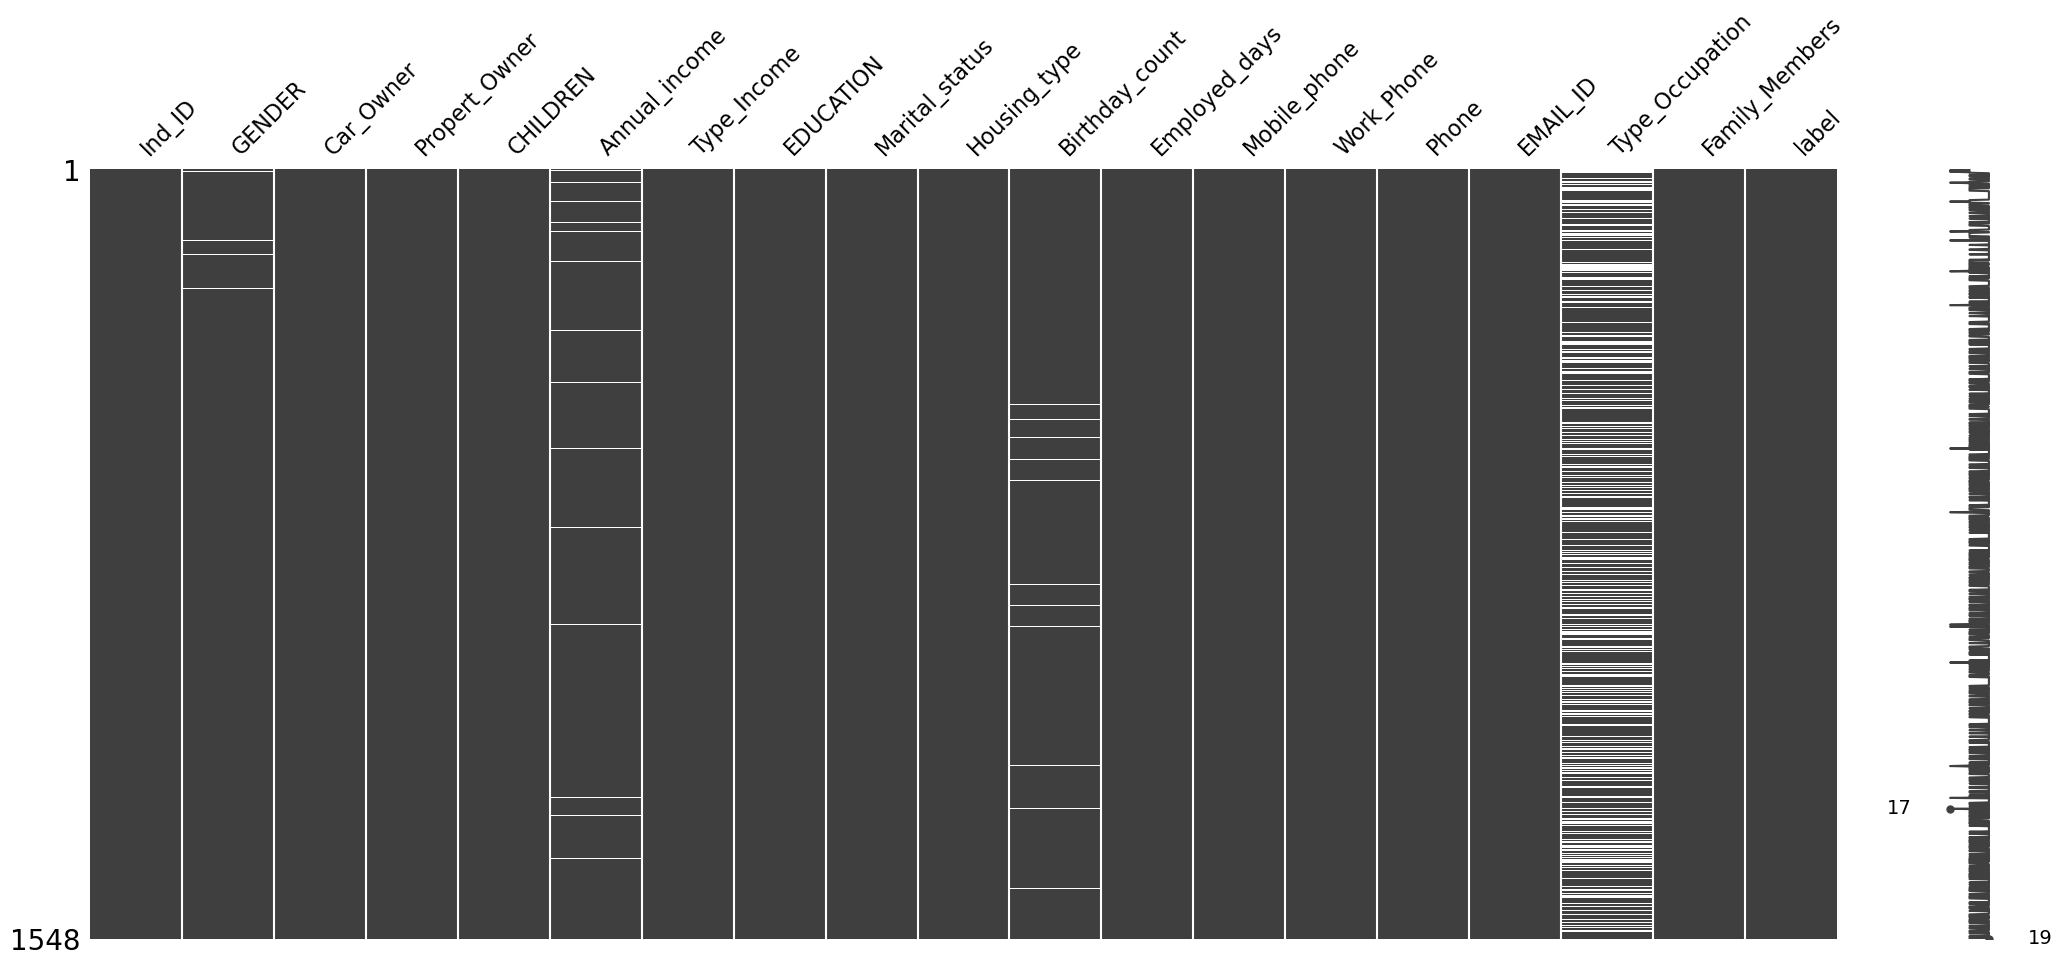

In [125]:
import missingno as msno 
msno.matrix(df)

#### Plus la colonne est noire , plus il y'a moins de valeur manquante .On constate que la colonne Type_Occupation a beaucoup de valeur manquantes

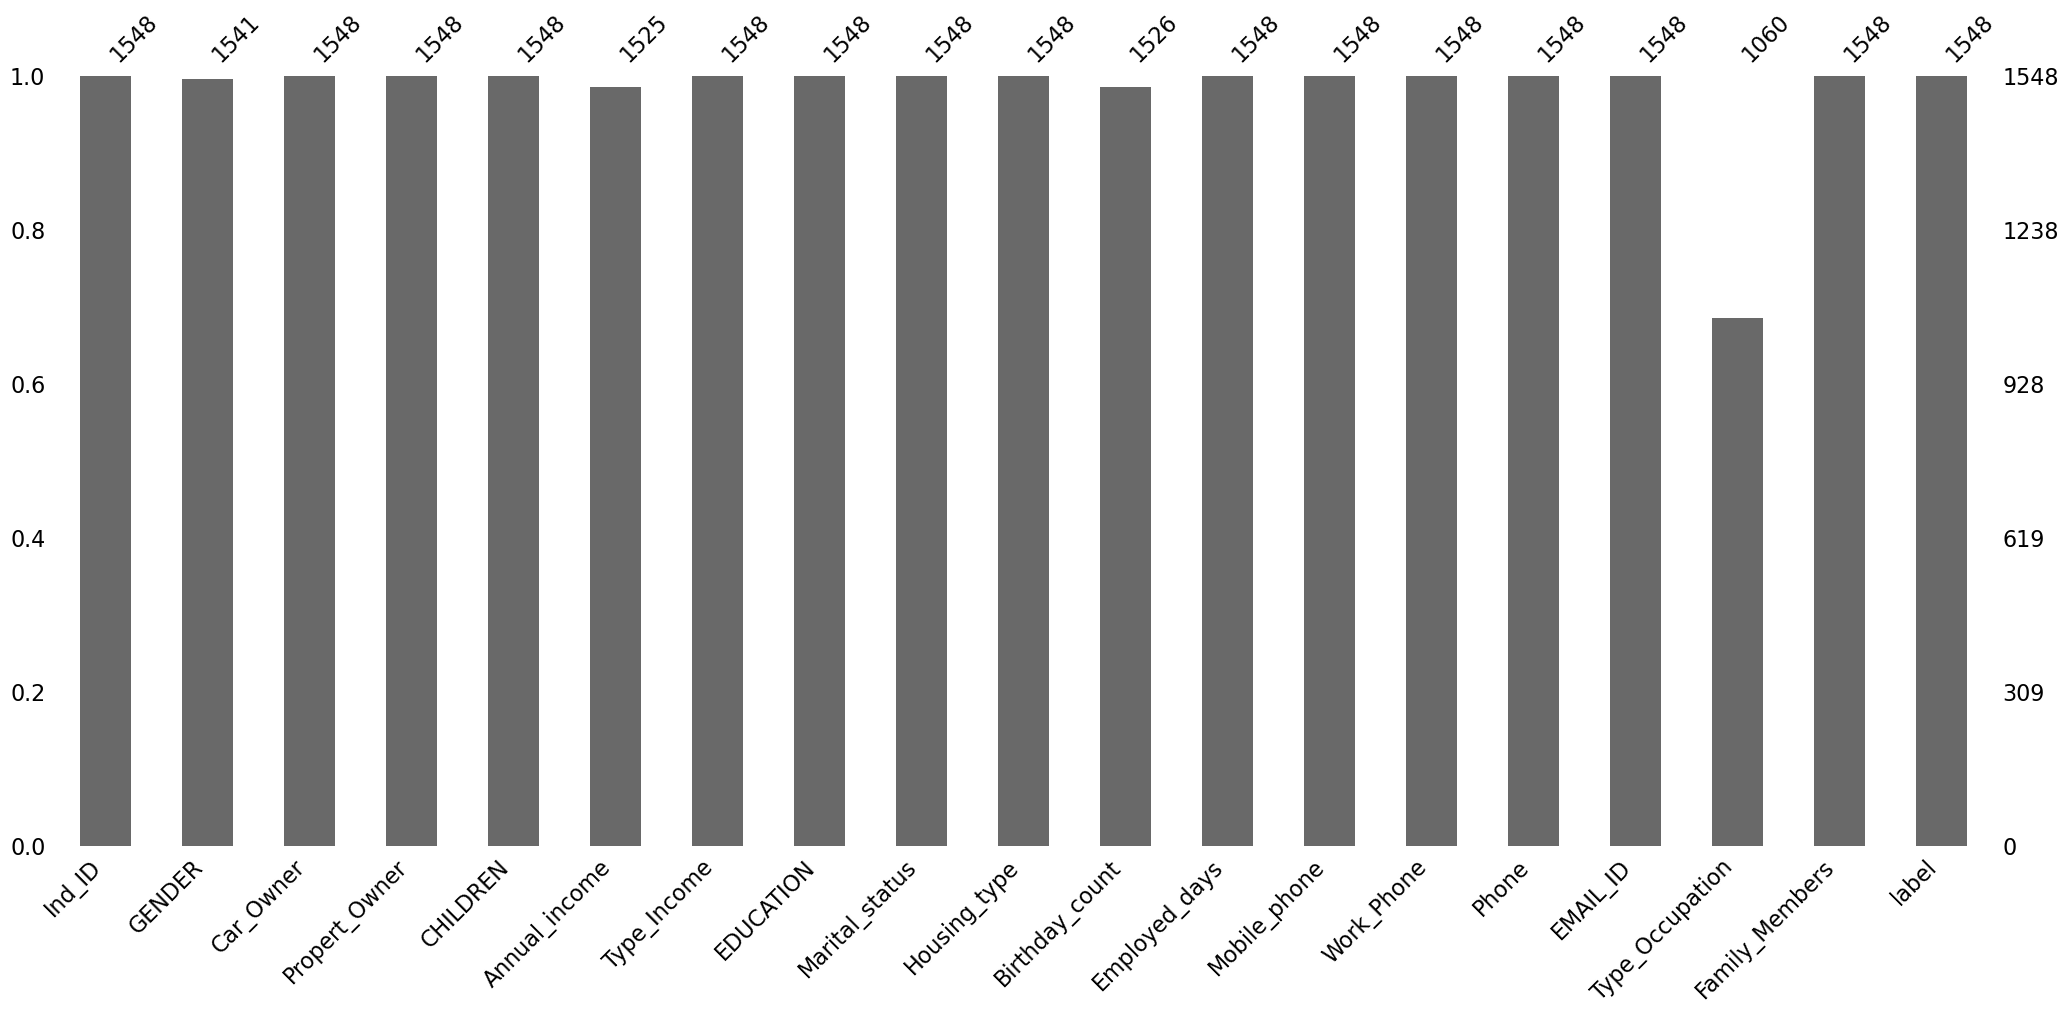

In [126]:
msno .bar(df)
plt.show()

#### la colonne Type_Occupation plus de 0.32% de valeur manquantes et elle est crucial dans ce cas d'etude.On ne peut donc pas la modifier avec des imputations.On va donc la supprimé .

<Axes: >

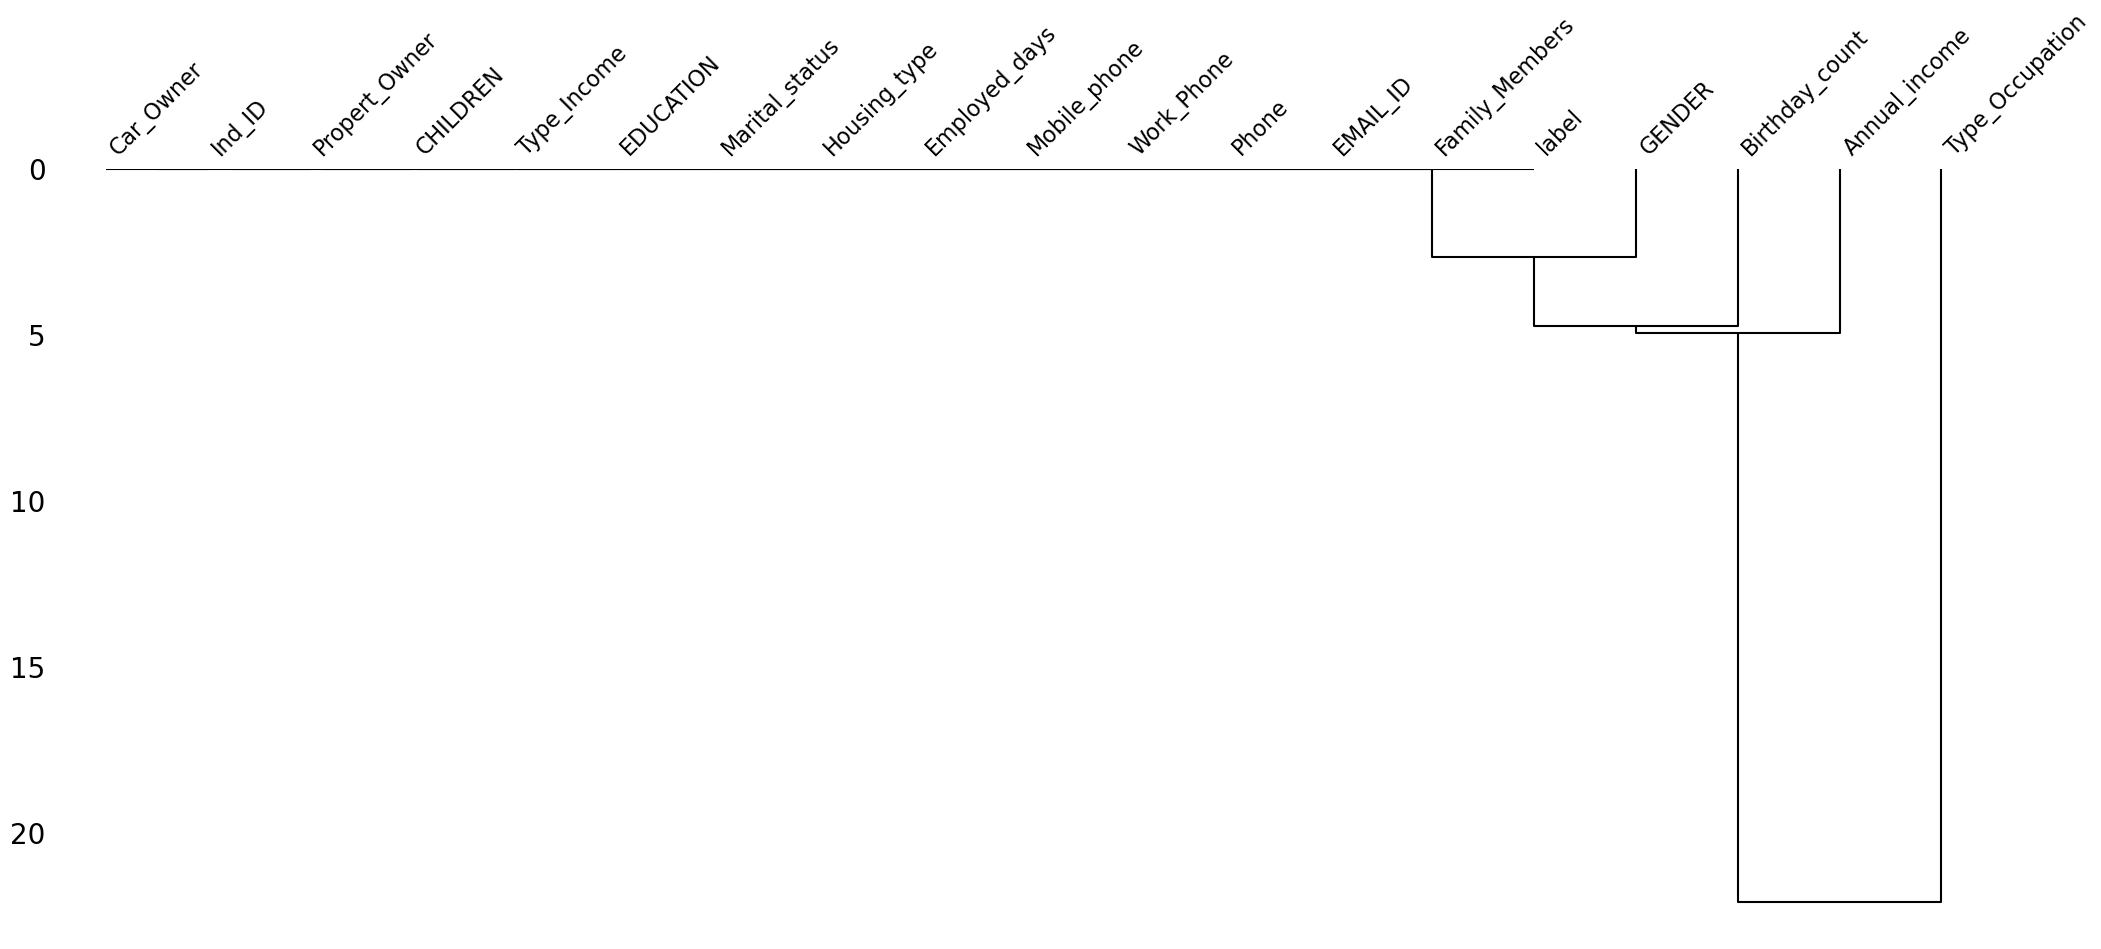

In [127]:
msno.dendrogram(df)

#### Ce dendogram montre qu'il y'a une certaine relation entre les valeurs manquantes de certaines variables .Donc c'est pas MCAR .On peut appliquer les techniques d'imputation comme KNN voisin , median , mean ... pour les autres variables .

In [128]:
df['Annual_income'].fillna(df.Annual_income.mean(),inplace = True)
df['Birthday_count'].fillna(df.Birthday_count.mean(),inplace = True)
df['GENDER'].fillna('O',inplace = True)

#### suppression de certaines variables qui ne sont pas peritinentes dans notre cas d'etude  et de la colonne Type_Occupation qui contient beaucoup de valeur manquante

In [129]:
df.drop(columns=("Type_Occupation"),inplace = True)
df.drop(columns=("Mobile_phone"),inplace = True)
df.drop(columns=("Work_Phone"),inplace = True)

In [130]:
data = df 

In [131]:
df.isna().sum()

Ind_ID            0
GENDER            0
Car_Owner         0
Propert_Owner     0
CHILDREN          0
Annual_income     0
Type_Income       0
EDUCATION         0
Marital_status    0
Housing_type      0
Birthday_count    0
Employed_days     0
Phone             0
EMAIL_ID          0
Family_Members    0
label             0
dtype: int64

#### Il n'ya plus de valeurs manquantes 

In [134]:
df.duplicated().sum()

0

  ###### CONVERSION EN BINAIRE POUR L'ANALYSE DES CORRELLATIONS , L'ANALYSE FACTORIELLE ET L'ANALYSE NON SUPERVISEE

In [135]:
d = df.copy()
d_pca = d.copy()

In [136]:
d['GENDER'] = d['GENDER'].apply(lambda row: 1 if row == 'M' else 0)
binary_cols = ['Car_Owner', 'Propert_Owner']
for col in binary_cols:
    d[col] = d[col].apply(lambda row: 1 if row == 'Y' else 0)

categorical_vars = ['Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type']

d = pd.get_dummies(d, columns=categorical_vars, drop_first=True)

In [137]:
d

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,...,EDUCATION_Secondary / secondary special,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
0,5008827,1,1,1,0,180000.00000,-18772.000000,365243,0,0,...,False,True,False,False,False,True,False,False,False,False
1,5009744,0,1,0,0,315000.00000,-13557.000000,-586,1,0,...,False,True,False,False,False,True,False,False,False,False
2,5009746,0,1,0,0,315000.00000,-16040.342071,-586,1,0,...,False,True,False,False,False,True,False,False,False,False
3,5009749,0,1,0,0,191399.32623,-13557.000000,-586,1,0,...,False,True,False,False,False,True,False,False,False,False
4,5009752,0,1,0,0,315000.00000,-13557.000000,-586,1,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0,1,0,191399.32623,-11957.000000,-2182,0,0,...,False,True,False,False,False,True,False,False,False,False
1544,5023655,0,0,0,0,225000.00000,-10229.000000,-1209,0,0,...,False,False,False,True,False,True,False,False,False,False
1545,5115992,1,1,1,2,180000.00000,-13174.000000,-2477,0,0,...,False,True,False,False,False,True,False,False,False,False
1546,5118219,1,1,0,0,270000.00000,-15292.000000,-645,1,0,...,True,False,False,False,False,True,False,False,False,False


# (b) analyse descriptive

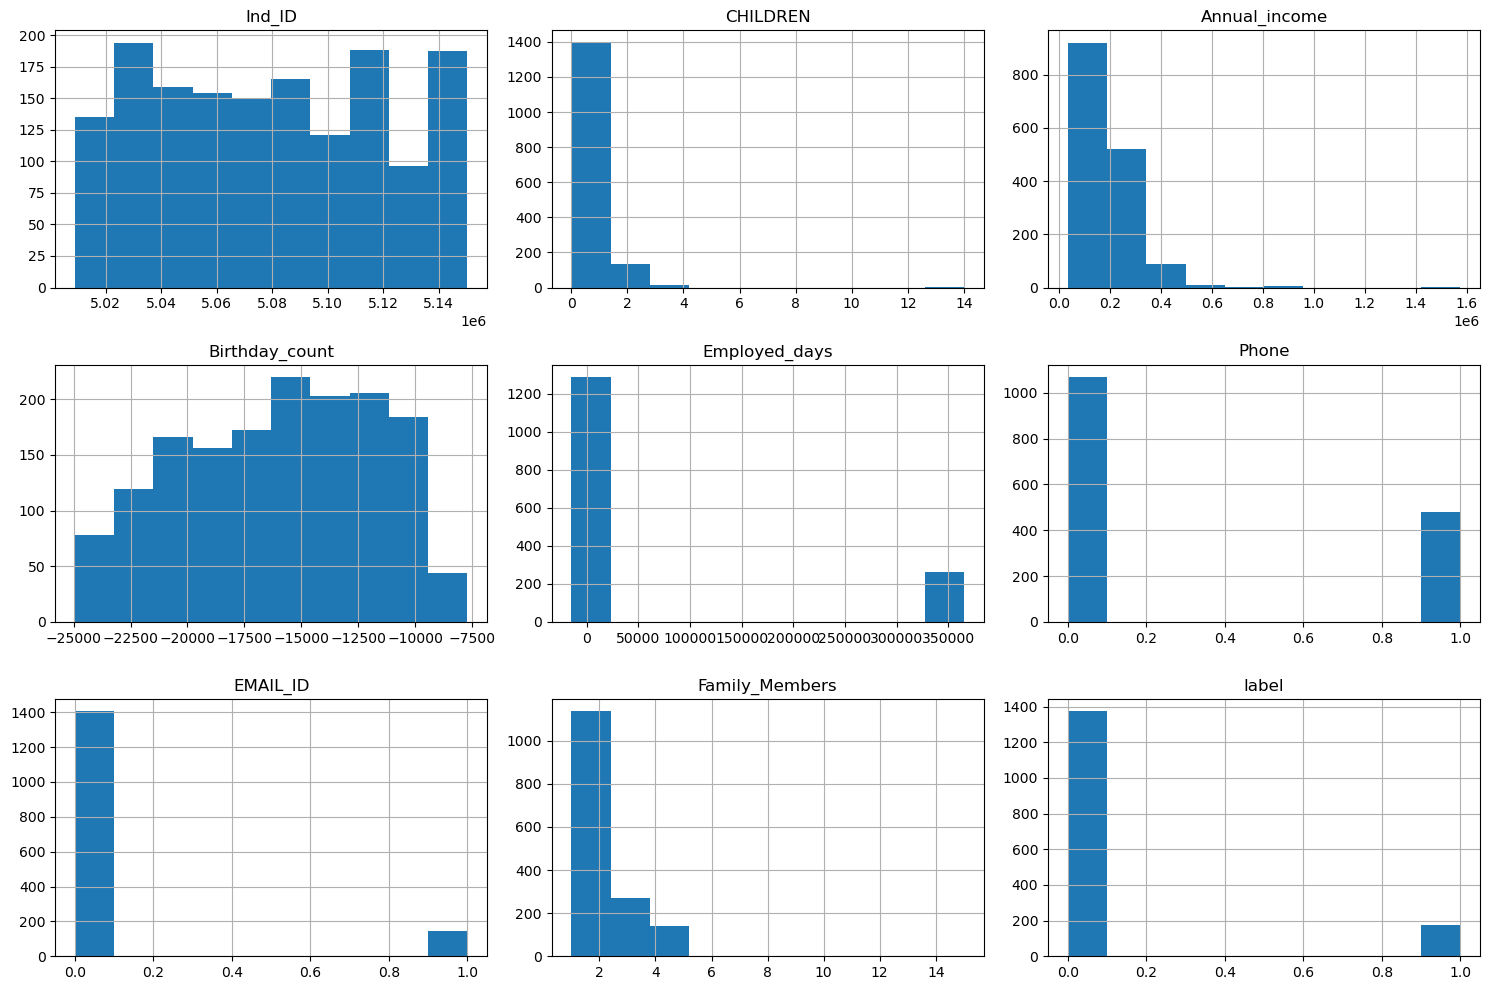

Error occurred: Horizontal orientation requires numeric `x` variable.


In [139]:
try:
  df.hist(figsize=(15, 10))
  plt.tight_layout()
  plt.show()

  for col in df.select_dtypes(include='object'):
    if col == 'Label': 
      df[col].value_counts().plot(kind='bar')
    else:
      if not df[col].dtype == 'object':
        df[col].hist() 
      else:
        sns.boxplot(x=col, y='label', data=df, orient="h") 

    plt.title(col)
    plt.show()

except Exception as e:
  print(f"Error occurred: {e}") 


In [140]:
label_count = df['label'].value_counts()
label_count

label
0    1373
1     175
Name: count, dtype: int64

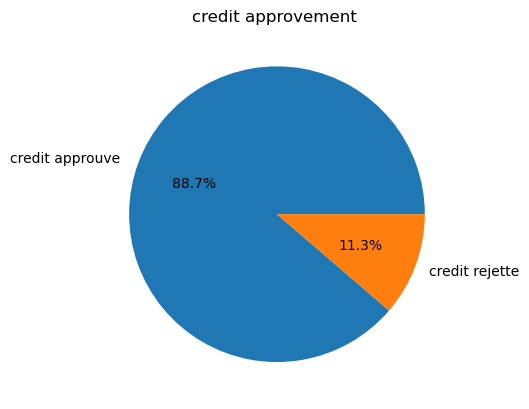

In [141]:
plt.pie(label_count,labels = ['credit approuve ', 'credit rejette'], autopct = "%1.1f%%")
plt.title("credit approvement ")
plt.show()

#### Il y'a plus de demande accepter que de demande rejeté 

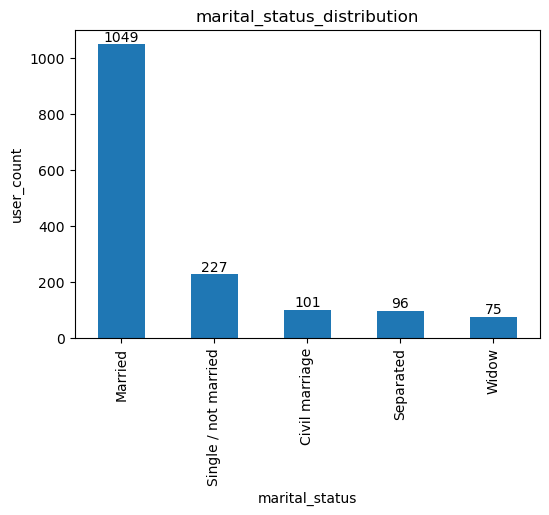

In [142]:
marital_status_counts = data['Marital_status'].value_counts()
plt.figure(figsize=(6,4))
marital_status_counts.plot(kind='bar')
plt.xlabel('marital_status')
plt.ylabel('user_count')
plt.title('marital_status_distribution')
for i, v in enumerate(marital_status_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()

#### Il y'a plus de maries qui vont a la banque pour faire des demandes de cartes que ceux qui sont d'une situation matrimoniale differente .

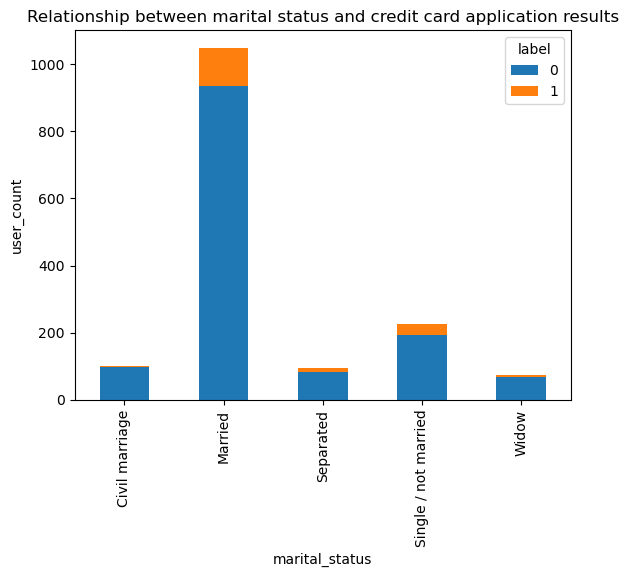

In [143]:
approval_by_marital = data.groupby('Marital_status')['label'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.xlabel('marital_status')
plt.ylabel('user_count')
plt.title('Relationship between marital status and credit card application results')
plt.show()

#### On constate que toutes les situations matrimoniales ont toutes une chance d'avoir une acceptation de carte de crédit 

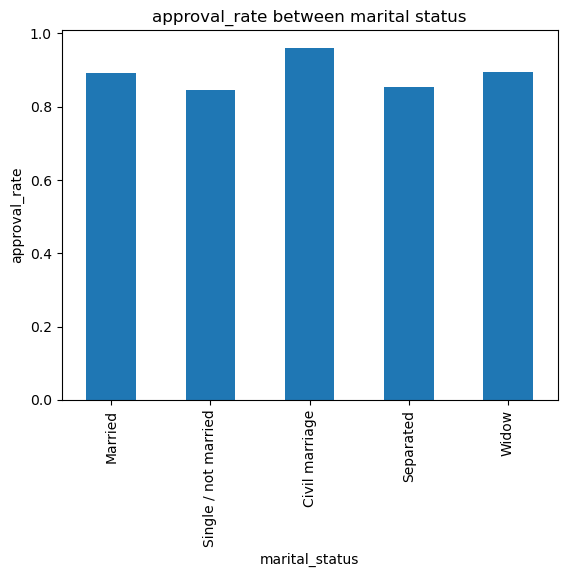

In [144]:
approved_by_marital = data[data['label'] == 0]['Marital_status'].value_counts()

total_by_marital = data['Marital_status'].value_counts()

approval_rate_by_marital = (approved_by_marital / total_by_marital).fillna(0)

approval_rate_by_marital.plot(kind='bar')
plt.xlabel('marital_status')
plt.ylabel('approval_rate')
plt.title('approval_rate between marital status')
plt.show()

#### les maries a l'etat civil ont plus de chance d'etre accepter 

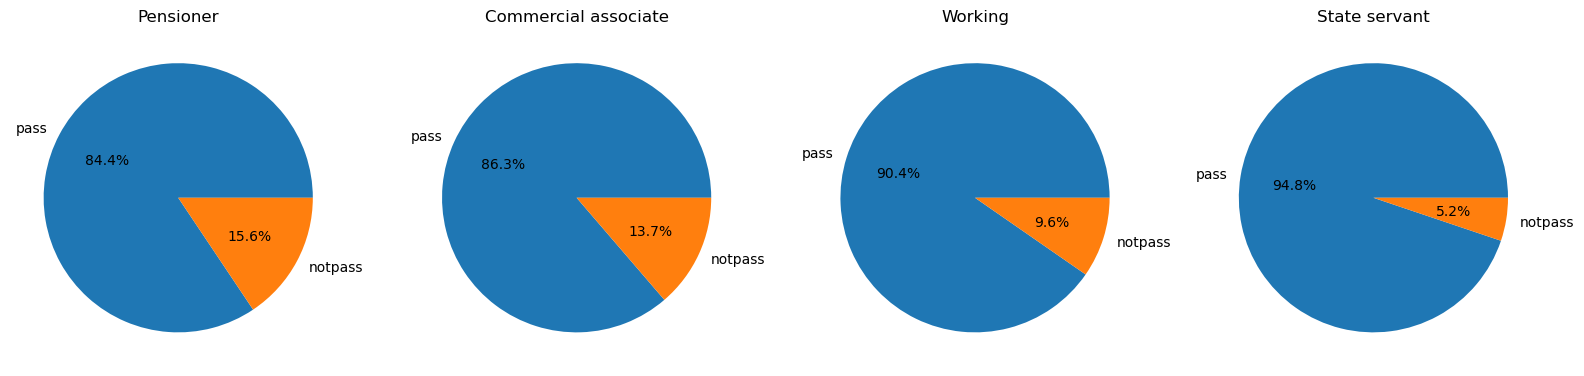

In [145]:
approved_count = data[data['label'] == 0]['Type_Income'].value_counts()
rejected_count = data[data['label'] == 1]['Type_Income'].value_counts()

income_types = data['Type_Income'].unique()

fig, axes = plt.subplots(1, len(income_types), figsize=(16, 6))

for i, occupation_type in enumerate(income_types):
    total_count = len(data[data['Type_Income'] == occupation_type])
    approved = approved_count.get(occupation_type, 0)
    rejected = rejected_count.get(occupation_type, 0)
    
    labels = ['pass', 'notpass']
    sizes = [approved / total_count, rejected / total_count]

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%')
    axes[i].set_title(occupation_type)

plt.tight_layout()
plt.show()

#### Les fonctionnaire de l'etat et les travailleurs ont plus de chance d'etre accepté , suivi des commercial associate .

# (c) analyse des corrélations,

In [146]:
d.corr()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Birthday_count,Employed_days,Phone,EMAIL_ID,...,EDUCATION_Secondary / secondary special,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents
Ind_ID,1.000000,0.027597,-0.046811,-0.050421,0.032535,0.029888,0.022778,-0.055396,0.008403,-0.037923,...,0.013797,-0.032530,0.007515,0.013948,0.012707,-0.060418,0.065992,0.015547,0.005193,0.011548
GENDER,0.027597,1.000000,0.366257,-0.038264,0.063068,0.208212,0.182423,-0.176383,-0.036990,-0.025321,...,-0.029271,0.097779,-0.062380,0.002683,-0.159302,-0.079101,0.004076,0.047559,0.084519,0.046292
Car_Owner,-0.046811,0.366257,1.000000,0.002401,0.063467,0.209528,0.144107,-0.150658,0.031096,0.038007,...,-0.121737,0.155392,-0.058413,-0.091225,-0.093429,0.032690,-0.067821,0.058412,0.017474,-0.007425
Propert_Owner,-0.050421,-0.038264,0.002401,1.000000,-0.003352,0.043927,-0.124128,0.100686,-0.080780,0.064180,...,-0.024969,-0.007039,0.002049,-0.004246,0.013053,0.212018,-0.146075,-0.033405,-0.019954,-0.148273
CHILDREN,0.032535,0.063068,0.063467,-0.003352,1.000000,0.078111,0.278041,-0.219095,-0.004908,0.025776,...,-0.064543,0.145940,0.001284,-0.133364,-0.096715,0.025007,-0.045196,0.003118,-0.012001,0.014946
Annual_income,0.029888,0.208212,0.209528,0.043927,0.078111,1.000000,0.110111,-0.158957,-0.006384,0.121842,...,-0.223944,-0.021794,-0.000438,0.066852,-0.065963,0.009693,-0.039795,0.045324,0.020977,0.003020
Birthday_count,0.022778,0.182423,0.144107,-0.124128,0.278041,0.110111,1.000000,-0.614352,-0.028952,0.166626,...,-0.200615,0.042342,-0.084433,0.111059,-0.245117,-0.167844,-0.008330,-0.019196,0.084378,0.209128
Employed_days,-0.055396,-0.176383,-0.150658,0.100686,-0.219095,-0.158957,-0.614352,1.000000,-0.003403,-0.118268,...,0.123682,-0.088263,0.034051,-0.030003,0.268019,0.061684,0.067241,-0.034679,-0.037385,-0.103760
Phone,0.008403,-0.036990,0.031096,-0.080780,-0.004908,-0.006384,-0.028952,-0.003403,1.000000,0.018105,...,-0.029701,0.028125,0.013295,-0.068110,0.057227,0.035873,-0.018444,-0.032808,-0.018097,-0.023701
EMAIL_ID,-0.037923,-0.025321,0.038007,0.064180,0.025776,0.121842,0.166626,-0.118268,0.018105,1.000000,...,-0.128858,0.033873,0.019719,-0.025035,-0.061597,-0.010620,0.001276,-0.024397,0.020444,0.016223


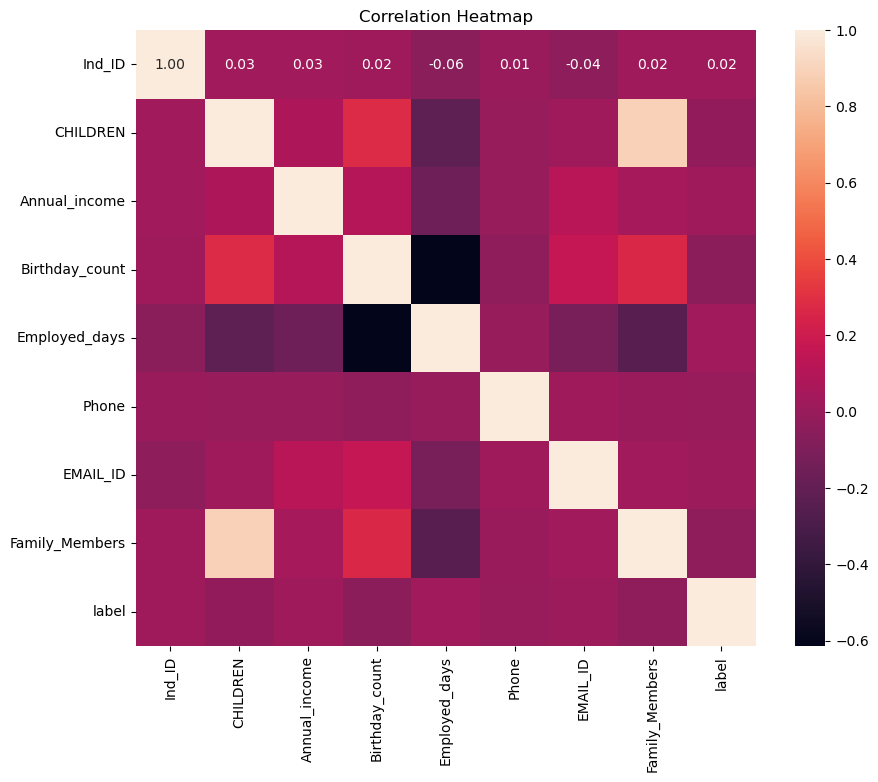

In [147]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=[np.number]).corr(), annot=True,  fmt=".2f")  
plt.title('Correlation Heatmap')  
plt.show()

#### Family_Members et GENDER sont fortement correles  ,suivi de Birthday_count et CHILDREN 

label                                      1.000000
Housing_type_Municipal apartment           0.112285
EDUCATION_Lower secondary                  0.063946
Type_Income_Pensioner                      0.062399
Marital_status_Single / not married        0.053852
GENDER                                     0.045664
Employed_days                              0.031408
EDUCATION_Higher education                 0.031249
Housing_type_Rented apartment              0.028675
Annual_income                              0.026875
Marital_status_Separated                   0.026622
Housing_type_Office apartment              0.026365
Ind_ID                                     0.016796
EMAIL_ID                                   0.012921
Phone                                     -0.000664
Marital_status_Widow                      -0.004548
Car_Owner                                 -0.014734
Propert_Owner                             -0.017906
Marital_status_Married                    -0.020029
CHILDREN    

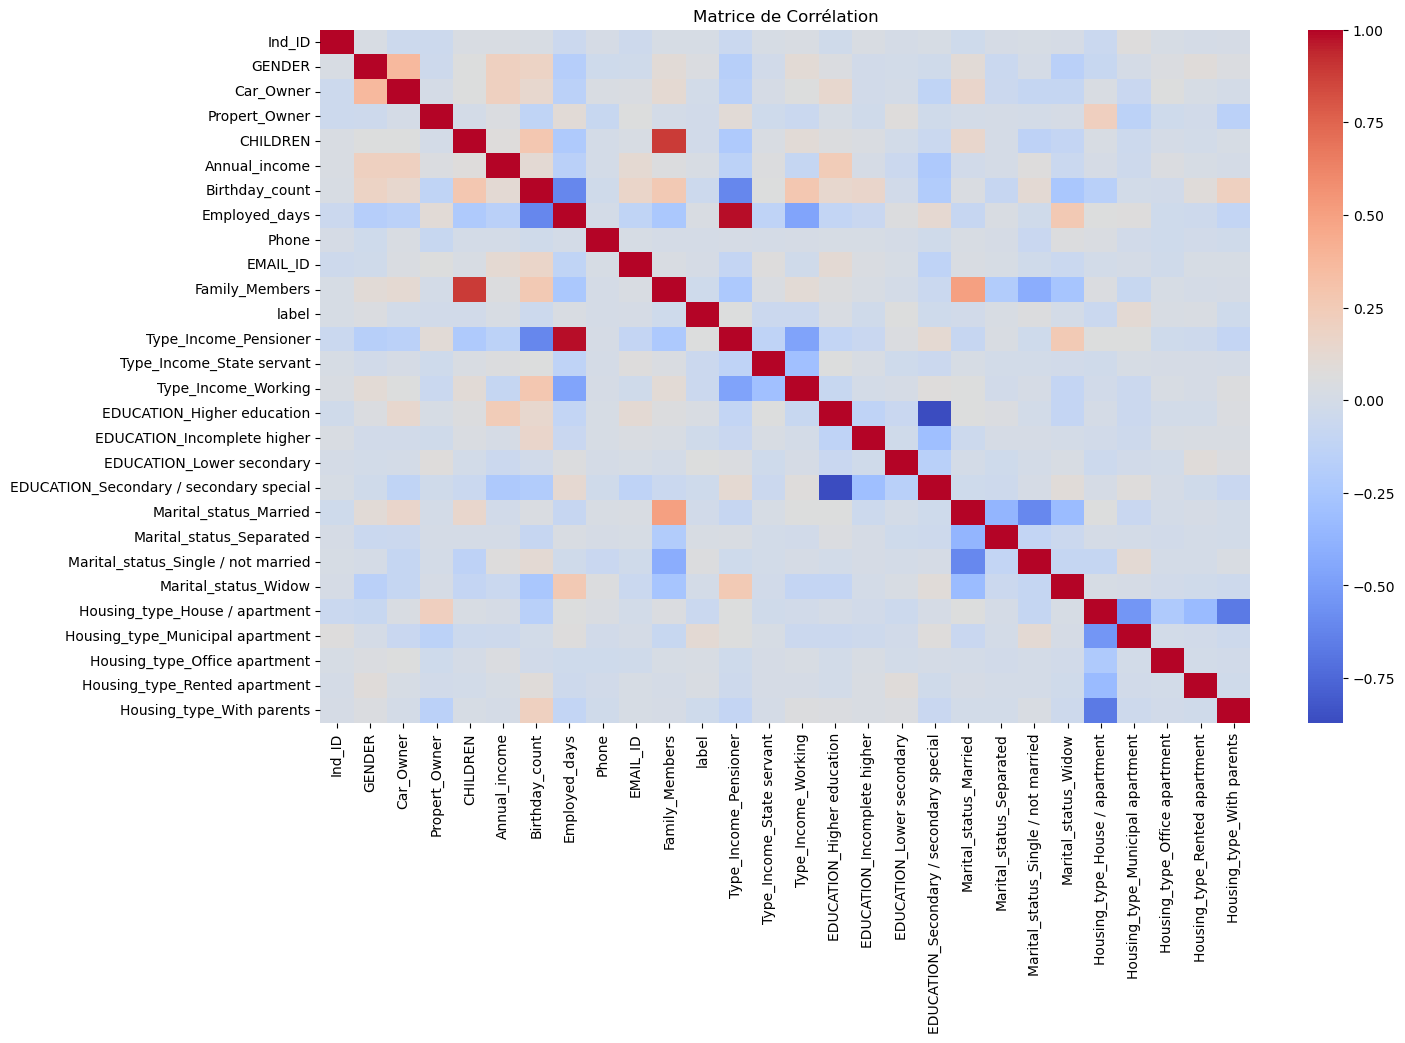

In [148]:
correlation_matrix = d.corr()

correlation_with_label = correlation_matrix['label'].sort_values(ascending=False)
print(correlation_with_label)

plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

#### Il y' a beaucoup de variable qui ont des liens entre elles .On peut donc faire une analyse factorielle 

# (d) analyse factorielle,

L'analyse factorielle est une méthode statistique qui cherche à réduire la dimensionnalité des données tout en préservant autant que possible les relations importantes entre les variables. Elle est souvent utilisée pour identifier des structures sous-jacentes (facteurs) dans un ensemble de variables observées.

Cependant, pour qu'une analyse factorielle soit significative, il est généralement nécessaire que les variables soient corrélées entre elles.Ce qui est le cas dans notre donnee.

### Analyse factorielle par composantes (PCA)

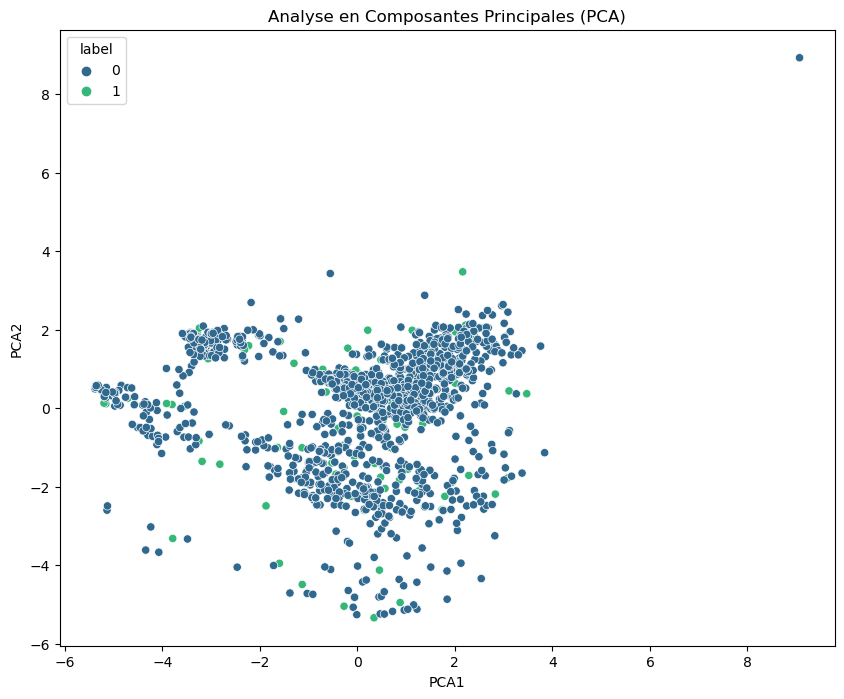

Variance expliquée par chaque composant : [0.13513647 0.08675069]


In [149]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(d.drop(columns=['label']))

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
d['PCA1'] = pca_components[:, 0]
d['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='label', data=d, palette='viridis')
plt.title('Analyse en Composantes Principales (PCA)')
plt.show()
print('Variance expliquée par chaque composant :', pca.explained_variance_ratio_)

##### On constate que a peu pres (0.17 + 0.10 + 0.07)* 100 = 34 % de nos données sont représentés .ne depasse pas 70% meme si on augmente le n_components 

##### usage d'autre methodes !!!!

### Analyse factorielle avec FactorAnalyzer 

#####  analyse exploratoire pour obtenir les valeurs propres

In [150]:
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

scaler = StandardScaler()
df_scaled = scaler.fit_transform(d.drop(columns=['label']))

In [151]:
df_scaled

array([[-1.68073003,  1.31352659,  1.21686862, ..., -0.2334436 ,
        -0.82903549,  1.11459704],
       [-1.65874179, -0.76130929,  1.21686862, ..., -0.2334436 ,
         0.56359633,  0.26335575],
       [-1.65869383, -0.76130929,  1.21686862, ..., -0.2334436 ,
         0.44594801,  0.33342735],
       ...,
       [ 0.88892073,  1.31352659,  1.21686862, ..., -0.2334436 ,
         1.59809857,  1.09965436],
       [ 0.94232074,  1.31352659,  1.21686862, ..., -0.2334436 ,
         0.31910406, -0.47557075],
       [-0.60258691, -0.76130929,  1.21686862, ..., -0.2334436 ,
         0.54283381,  0.36200041]])

In [152]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(df_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

#### dtm le nombre de facteurs avec factor analyser ( )

Valeurs propres :
[ 4.64868463e+00  3.34226889e+00  2.06143591e+00  1.81747791e+00
  1.42883709e+00  1.27830839e+00  1.18487576e+00  1.16814385e+00
  1.12389753e+00  1.08368900e+00  1.04438348e+00  1.02472932e+00
  9.96041206e-01  9.72703814e-01  9.45780618e-01  9.13687512e-01
  8.65923147e-01  7.83167555e-01  7.13564891e-01  5.90025498e-01
  4.70080048e-01  3.60487866e-01  1.39686460e-01  1.78310269e-02
  1.56199631e-02  6.00240028e-03  2.66621574e-03  1.08236260e-16
 -3.07923284e-16]


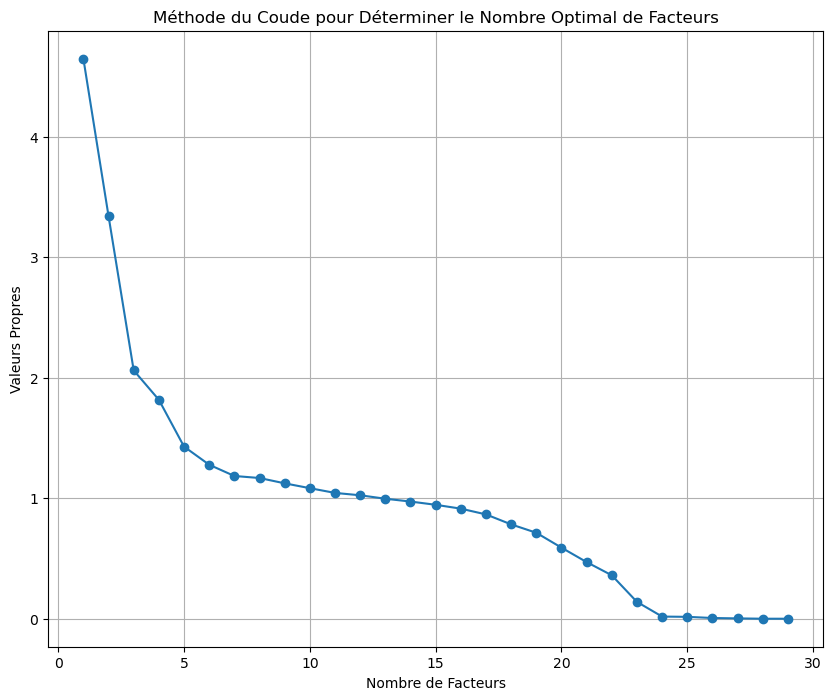

In [153]:
eigenvalues, _ = fa.get_eigenvalues()
print("Valeurs propres :")
print(eigenvalues)

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Nombre de Facteurs')
plt.ylabel('Valeurs Propres')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Facteurs')
plt.grid()
plt.show()

#### dtm le nombre de composantes avec PCA 

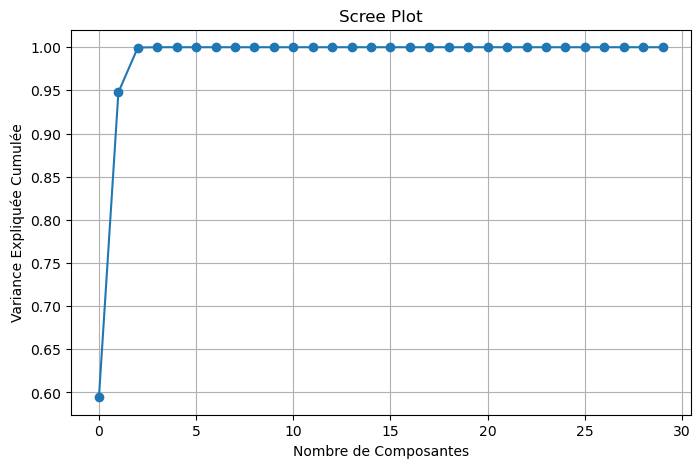

In [154]:
pca = PCA()
pca.fit(d)

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

##### Dans les deux cas , on note une stabibilisation au niveau de n = 3 

Charges factorielles des variables sur les facteurs optimaux :
                                          Factor1   Factor2   Factor3
Ind_ID                                   0.024356 -0.095704 -0.009057
GENDER                                   0.213415 -0.115614  0.135434
Car_Owner                                0.211701  0.031732  0.204770
Propert_Owner                           -0.048055  0.231963  0.000733
CHILDREN                                 0.550082  0.164365  0.119807
Annual_income                            0.059078 -0.033045  0.309999
Birthday_count                           0.478964 -0.432211  0.338456
Employed_days                           -0.642405  0.500140 -0.298116
Phone                                    0.005755  0.054144  0.014589
EMAIL_ID                                 0.061718 -0.028593  0.178335
Family_Members                           0.753500  0.335137  0.117097
label                                   -0.076978 -0.019872  0.025956
Type_Income_Pensioner      

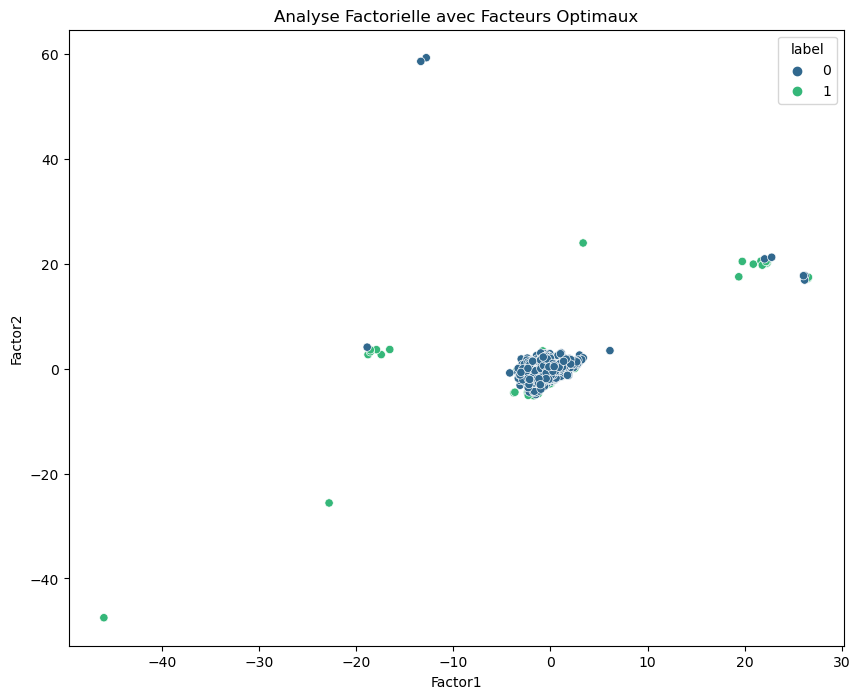

In [155]:
optimal_factors = 3

fa_optimal = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa_optimal.fit(d)

factor_loadings = fa_optimal.loadings_
factor_scores = fa_optimal.transform(d)

factor_loadings_df = pd.DataFrame(factor_loadings, index=d.columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("Charges factorielles des variables sur les facteurs optimaux :")
print(factor_loadings_df)

d[f'Factor1'] = factor_scores[:, 0]
d[f'Factor2'] = factor_scores[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Factor1', y='Factor2', hue='label', data=d, palette='viridis')
plt.title('Analyse Factorielle avec Facteurs Optimaux')
plt.show()


In [156]:
variance_explained = fa.get_factor_variance()
print("Variance expliquée par chaque facteur :")
print(variance_explained)

Variance expliquée par chaque facteur :
(array([3.84090836, 2.90435699, 2.2593613 ]), array([0.13244512, 0.10015024, 0.07790901]), array([0.13244512, 0.23259536, 0.31050437]))


#### On constate que certaine varaible sont bien represente au niveau du premier plan factoriel (variance cumulée > 70 % ) 

# (e) analyse non supervisée.

#### Analyse non supervisée (K-means)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


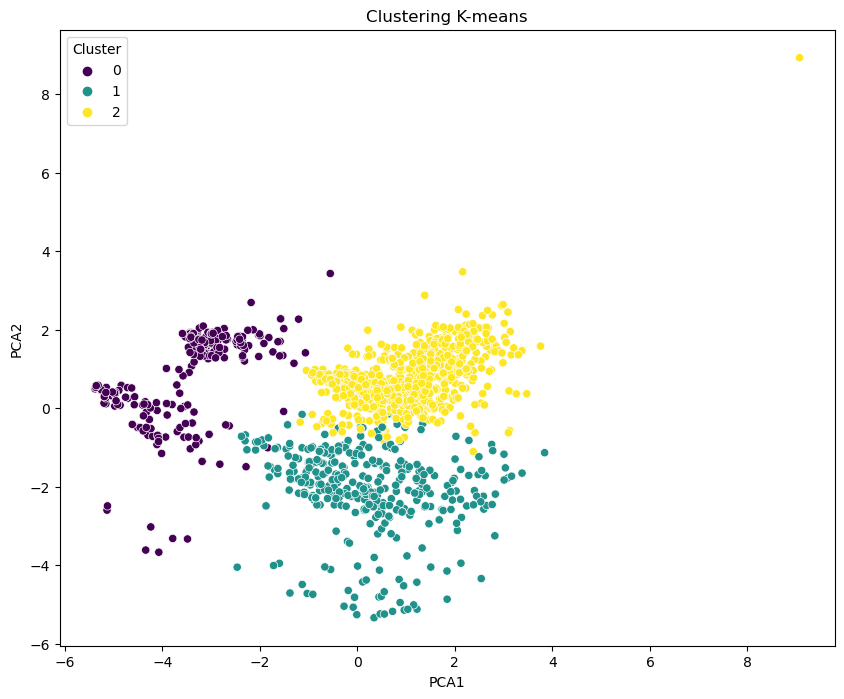

Centres des clusters : [[-1.33932619e-01 -3.91925630e-01 -3.43007535e-01  2.36663054e-01
  -4.82859885e-01 -3.69290865e-01 -1.36815578e+00  2.17993949e+00
   1.07351326e-02 -2.53620778e-01 -5.26267127e-01  2.16052192e+00
  -2.70227927e-01 -1.03150376e+00 -2.59963728e-01 -1.58899873e-01
   1.11940371e-01  2.90500878e-01 -2.01797062e-01  7.26829801e-02
  -7.18837746e-02  6.21144214e-01  1.54064752e-01  1.24178134e-01
  -7.64719113e-02 -8.45264027e-02 -2.33443597e-01 -1.80966149e+00
   5.48022582e-01]
 [ 8.49138970e-02  5.82508834e-02 -1.23543772e-01 -2.25654954e-01
  -1.96783556e-01  1.00363717e-01  4.39173994e-01 -4.42373963e-01
  -1.06934625e-01  9.05774005e-03 -6.42766138e-01 -4.45411587e-01
   2.87313737e-02  2.39107224e-01 -1.16293334e-02  1.15024022e-01
   7.72312411e-02 -6.04722467e-02 -9.84534693e-01  4.99554870e-01
   9.56499118e-01  6.54375839e-02 -8.40627132e-01  3.06657013e-01
   2.19474385e-01  3.14956038e-01  6.47397454e-01  1.08230351e-01
  -1.36731148e+00]
 [ 1.57539901e-

In [157]:
try :
    kmeans = KMeans(n_clusters=3, random_state=42)
    d['Cluster'] = kmeans.fit_predict(df_scaled)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=d, palette='viridis')
    plt.title('Clustering K-means')
    plt.show()
    print('Centres des clusters :', kmeans.cluster_centers_)
except :
    print("error")

In [158]:
print("Distribution des clusters :")
print(d['Cluster'].value_counts())

Distribution des clusters :
Cluster
2    884
1    400
0    264
Name: count, dtype: int64


#### Il existe trois groupes de personnes dans nos données 

In [159]:
cluster_summary = d.groupby('Cluster').mean()
print("RESUME DES CLUSTERS : \n")
print(cluster_summary)

RESUME DES CLUSTERS : 

               Ind_ID    GENDER  Car_Owner  Propert_Owner  CHILDREN  \
Cluster                                                               
0        5.073335e+06  0.178030   0.234848       0.765152  0.037879   
1        5.082462e+06  0.395000   0.342500       0.545000  0.260000   
2        5.078986e+06  0.410633   0.480769       0.667421  0.593891   

         Annual_income  Birthday_count  Employed_days     Phone  EMAIL_ID  \
Cluster                                                                     
0        149901.506837   -21783.812001  359680.878788  0.314394  0.018939   
1        202677.361525   -14196.705066   -1578.315000  0.260000  0.095000   
2        198689.156774   -15159.322546   -2746.477376  0.330317  0.113122   

         ...  Marital_status_Widow  Housing_type_House / apartment  \
Cluster  ...                                                         
0        ...              0.181818                        0.939394   
1        ...            

#### Determinations des caracteristiques de chaque cluster 

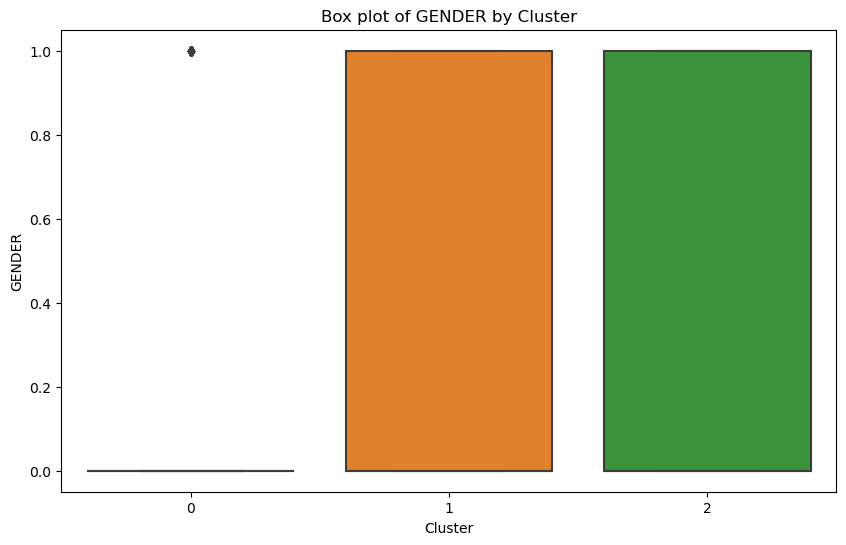

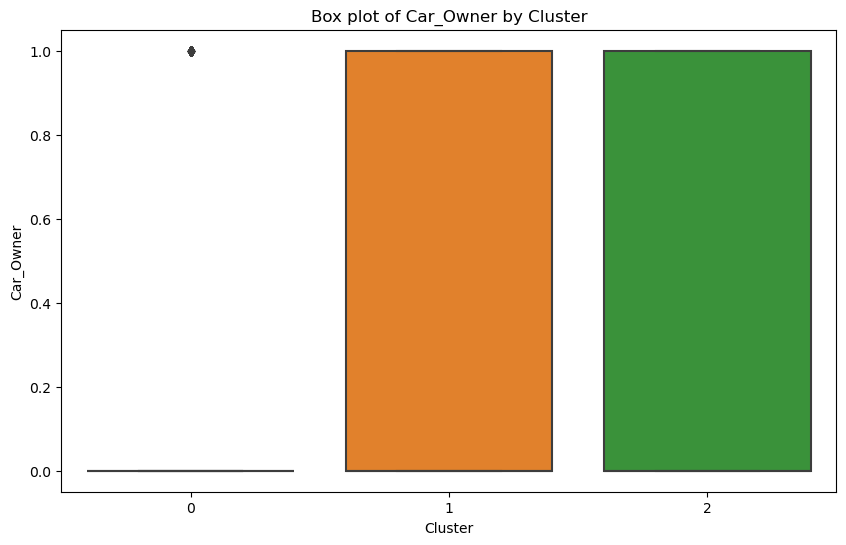

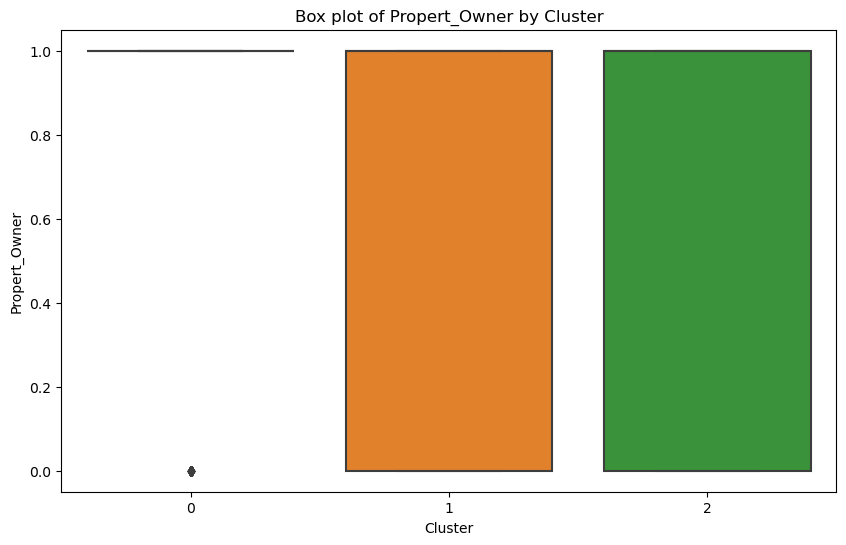

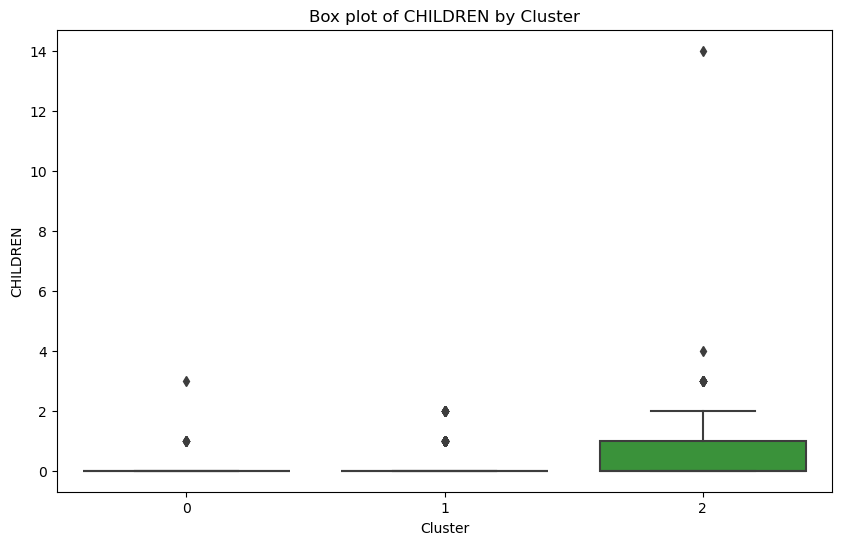

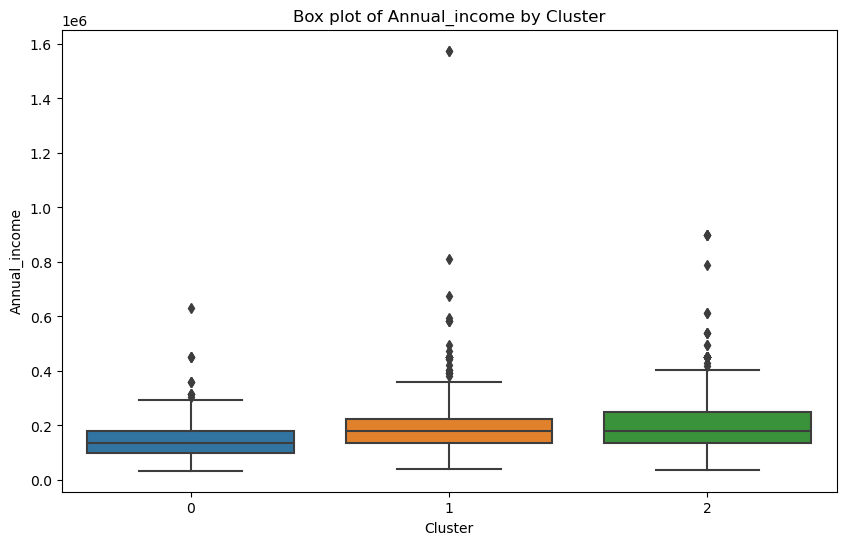

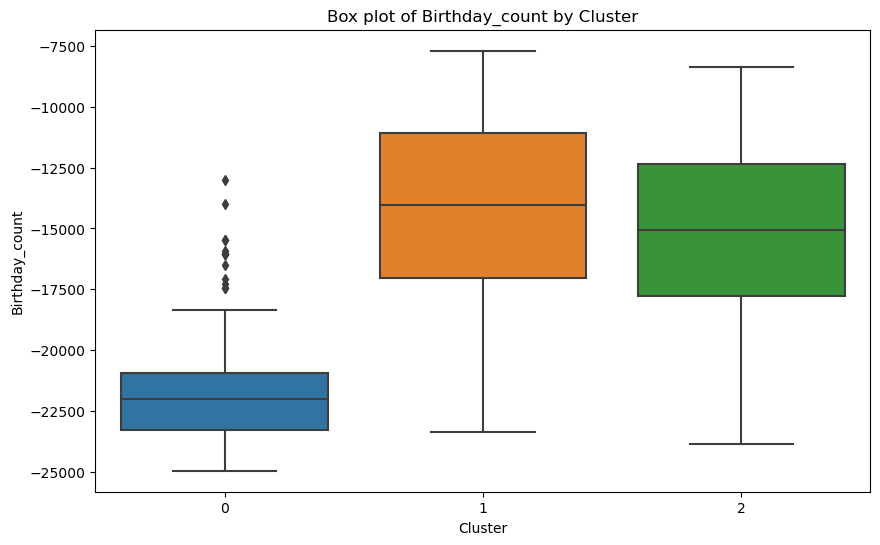

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt
colonnes_a_inclure = ['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income' , 'Birthday_count' ]
features = d[colonnes_a_inclure]

try :
    for column in features.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster', y=column, data=d)
        plt.title(f'Box plot of {column} by Cluster')
        plt.show()
except:
    print("error")

#### notes : peu ou pas de moustaches = distribution homogene . Une boîte plus large (grand IQR) indique une plus grande variabilité des valeurs au sein du cluster.

#### le cluster 0 est homogene pour la variable gender  mais indique une plus grande variabilité des valeurs au sein du cluster 1 et 2. il en est de meme pour car_Owner et Propert_Owner .
#### les gens qui ont des enfants on tendance a etre dans le cluster 2

### les gens qui ont un revenu annuel eleve sont dans le cluster 1 et 2
### ceux qui ont un revenu faible sont dans le cluster 0 
### le cluster 1 represente les gens qui ont un birthday-count plus élevé suivi du cluster 2